In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [25]:
main_df = pd.read_csv('../data/main_dataset.csv', dtype={'ZIPCODE':str})

# print out how many properties are here in total
print(len(main_df))

178598


Remove commercial properties. Commercial properties have code C (Commercial), CC (Commercial Condominium) and CL (Commercial Land).

In [26]:
main_df = main_df[~main_df['LU'].isin(["C", "CC", "CL"])]

# print out how many properties are left after removing commercial properties
print(len(main_df))

170769


In [28]:
main_df[['UNIT_NUM', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS']]

,UNIT_NUM,RES_UNITS,COM_UNITS,RC_UNITS
0,NaN,0,0,0
1,NaN,0,0,0
2,NaN,0,0,0
3,NaN,0,0,0
4,NaN,0,0,0
...,...,...,...,...
178592,1,1,0,0
178593,NaN,0,0,0
178594,NaN,0,0,0
178595,NaN,0,0,0


In [30]:
main_df = main_df[main_df['UNIT_NUM'].notna()]
main_df[['UNIT_NUM', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS']]

,UNIT_NUM,RES_UNITS,COM_UNITS,RC_UNITS
18,1,0,0,0
19,2,0,0,0
20,3,0,0,0
21,4,0,0,0
23,1,1,0,0
...,...,...,...,...
178544,82,1,0,0
178558,1,1,0,0
178559,2,1,0,0
178591,2,1,0,0


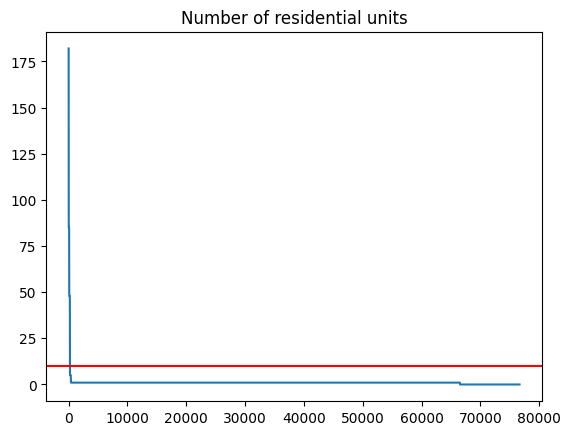

In [36]:
residential_units = np.array(sorted(main_df['RES_UNITS'], reverse = True))
plt.title("Number of residential units")
plt.plot(residential_units)
k = 10
plt.axhline(k, color='r')

In [34]:
main_df.RES_UNITS.unique()

array([  0,   1,   6,   5, 182,   2,   3,  38, 108,   8,  48,   4,  17,
        85], dtype=int64)

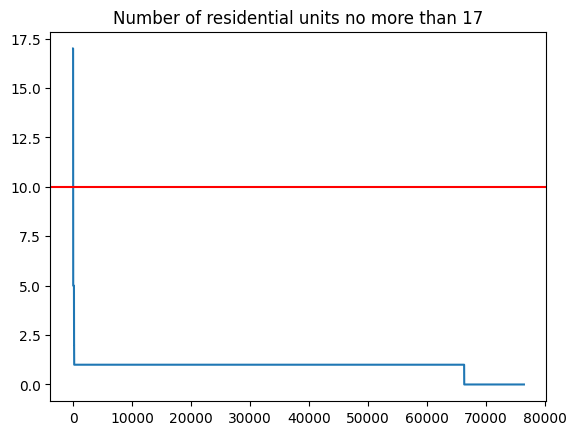

In [35]:
plt.title('Number of residential units no more than 17')
plt.plot(residential_units[residential_units <= 17])
k = 10
plt.axhline(k, color='r')

Remove properties that have no residential unites or more than 10 residential units

In [42]:
main_df = main_df.loc[main_df['RES_UNITS'] > 0]
main_df = main_df.loc[main_df['RES_UNITS'] < 10]

<BarContainer object of 16 artists>

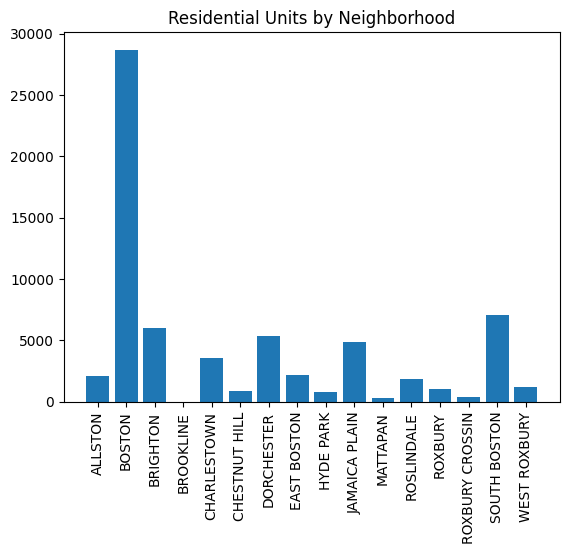

In [58]:
neighborhoods = main_df.groupby('CITY')['CITY'].count()
plt.title('Residential Units by Neighborhood')
plt.xticks(rotation=90)
plt.bar(neighborhoods.index, neighborhoods)

In [59]:
main_df

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
23,100019002,0100019000,1.000190e+08,241,LEXINGTON ST,1,EAST BOSTON,02128,1.0,1,...,NaN,NaN,F - Forced Hot Air,Y - Self Contained,C - Central AC,0,T - Through,0,A - Average,N - No
24,100019004,0100019000,1.000190e+08,241,LEXINGTON ST,2,EAST BOSTON,02128,1.0,1,...,NaN,NaN,F - Forced Hot Air,Y - Self Contained,C - Central AC,0,T - Through,0,A - Average,N - No
25,100019006,0100019000,1.000190e+08,241,LEXINGTON ST,3,EAST BOSTON,02128,1.0,1,...,NaN,NaN,F - Forced Hot Air,Y - Self Contained,C - Central AC,0,T - Through,0,A - Average,N - No
31,100024002,0100024000,1.000240e+08,249,LEXINGTON ST,1,EAST BOSTON,02128,1.0,1,...,NaN,NaN,F - Forced Hot Air,I - Indiv. Cntrl,C - Central AC,0,T - Through,0,A - Average,N - No
32,100024004,0100024000,1.000240e+08,249,LEXINGTON ST,2,EAST BOSTON,02128,1.0,1,...,NaN,NaN,F - Forced Hot Air,I - Indiv. Cntrl,C - Central AC,0,T - Through,0,A - Average,N - No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178544,2205629004,2205629000,2.205629e+09,80 82,KENRICK ST,82,BRIGHTON,02135,1.0,1,...,NaN,NaN,F - Forced Hot Air,I - Indiv. Cntrl,N - None,0,T - Through,1,G - Good,N - No
178558,2205642002,2205642000,2.205642e+09,12,KENRICK ST,1,BRIGHTON,02135,1.0,1,...,NaN,NaN,F - Forced Hot Air,I - Indiv. Cntrl,C - Central AC,1,T - Through,1,A - Average,N - No
178559,2205642004,2205642000,2.205642e+09,12,KENRICK ST,2,BRIGHTON,02135,1.0,1,...,NaN,NaN,W - Ht Water/Steam,I - Indiv. Cntrl,N - None,1,T - Through,1,A - Average,N - No
178591,2205665002,2205665000,2.205665e+09,14,LAKE ST,2,BRIGHTON,02135,1.0,1,...,NaN,NaN,W - Ht Water/Steam,I - Indiv. Cntrl,N - None,1,T - Through,1,A - Average,N - No
